In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from statsmodels.regression.rolling import RollingOLS

# Data
## Stocks close price

In [2]:
close_price = pd.read_excel("../data/stock_returns.xlsx")
close_price.head()

,Ticker,Monthly Calendar Date,Monthly Price,Monthly Price Date,Monthly Previous Price,Monthly Total Return
0,ACF,1961-01-31,50.250,1961-01-31,38.000,0.322368
1,ACF,1961-02-28,50.375,1961-02-28,50.250,0.014743
2,ACF,1961-03-30,54.750,1961-03-30,50.375,0.086849
3,ACF,1961-04-28,56.000,1961-04-28,54.750,0.022831
4,ACF,1961-05-31,59.750,1961-05-31,56.000,0.078315


## Risk free rate

In [15]:
rf_all = pd.read_excel("../data/riskfree.xlsx")
set(rf_all["TTERMLBL"])

{'30-Day Commercial Paper CP30D',
 '60-Day Commercial Paper CP60D',
 '90-Day Commercial Paper CP90D',
 'CRSP Fixed Term Index - 1-Year (Nominal)',
 'CRSP Fixed Term Index - 10-Year (Nominal)',
 'CRSP Fixed Term Index - 2-Year (Nominal)',
 'CRSP Fixed Term Index - 20-Year (Nominal)',
 'CRSP Fixed Term Index - 30-Year (Nominal)',
 'CRSP Fixed Term Index - 5-Year (Nominal)',
 'CRSP Fixed Term Index - 7-Year (Nominal)',
 'CRSP Risk Free - 13 week (Nominal)',
 'CRSP Risk Free - 26 week (Nominal)',
 'CRSP Risk Free - 4 week (Nominal)',
 'CRSP Risk Free Rates - 1-Month (Nominal)',
 'CRSP Risk Free Rates - 3-Month (Nominal)',
 'Fama Bliss Discount Bonds - 1-Year (Nominal)',
 'Fama Bliss Discount Bonds - 2-Year (Nominal)',
 'Fama Bliss Discount Bonds - 3-Year (Nominal)',
 'Fama Bliss Discount Bonds - 4-Year (Nominal)',
 'Fama Bliss Discount Bonds - 5-Year (Nominal)',
 'Fama Maturity Portfolios - <= 12 Month',
 'Fama Maturity Portfolios - <= 6 Month',
 'Fama Maturity Portfolios - > 12 and <= 18 

In [16]:
rf = rf_all[rf_all["TTERMLBL"] == 'CRSP Risk Free Rates - 3-Month (Nominal)'].copy()
rf = rf[["MCALDT", "TMBIDYTM"]]
rf.index = list(range(rf.shape[0]))
rf.head()

,MCALDT,TMBIDYTM
0,1960-01-29,4.055467
1,1960-02-29,4.333130
2,1960-03-31,3.094140
3,1960-04-29,3.093974
4,1960-05-31,3.227289


## Russell index return

In [8]:
RMID = pd.read_excel("../data/PriceHistory.xlsx", index_col=0)
RMID.head()

,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
Date,,,,,,,,,
1979-01-31,105.996,NaN,5.996,5.996000,106.250,6.250,NaN,105.996,105.996
1979-02-28,102.385,NaN,-3.611,-3.406732,103.201,3.201,NaN,102.385,102.385
1979-03-30,110.369,NaN,7.984,7.798017,111.715,11.715,NaN,110.369,110.369
1979-04-30,111.249,NaN,0.880,0.797325,112.910,12.910,NaN,111.249,111.249
1979-05-31,109.688,NaN,-1.561,-1.403159,111.984,11.984,NaN,109.688,109.688


## S&P500

In [56]:
SP500 = pd.read_excel("../data/sp500.xlsx", index_col=0)
SP500.head()

,Value-Weighted Return-incl. dividends,Equal-Weighted Return-incl. dividends
Calendar Date,,
1970-01-30,-0.075398,-0.058388
1970-02-27,0.059521,0.068592
1970-03-31,0.002806,0.003637
1970-04-30,-0.088831,-0.108800
1970-05-29,-0.054689,-0.082317


In [57]:
SP500.columns = ["mkt_ret_v", "mkt_ret"]

# calculate beta

In [3]:
close_price["q_pre_p"] = close_price["Monthly Price"].shift(3)
close_price["q_ret"] = close_price["Monthly Price"] / close_price["q_pre_p"] - 1

In [7]:
close_price = close_price[close_price["Monthly Price Date"]
                          >= datetime.strptime("1979-01-31", "%Y-%m-%d")]
close_price.index = close_price["Monthly Price Date"]
close_price.head()

,Ticker,Monthly Calendar Date,Monthly Price,Monthly Price Date,Monthly Previous Price,Monthly Total Return,q_pre_p,q_ret
Monthly Price Date,,,,,,,,
1979-01-31,ACF,1979-01-31,30.375,1979-01-31,30.750,-0.012195,32.000,-0.050781
1979-02-28,ACF,1979-02-28,29.500,1979-02-28,30.375,-0.011951,31.250,-0.056000
1979-03-30,ACF,1979-03-30,32.000,1979-03-30,29.500,0.084746,30.750,0.040650
1979-04-30,ACF,1979-04-30,34.500,1979-04-30,32.000,0.078125,30.375,0.135802
1979-05-31,ACF,1979-05-31,32.875,1979-05-31,34.500,-0.031407,29.500,0.114407


In [17]:
close_price["ann_ret_s"] = close_price["Monthly Total Return"] * 12
RMID["ann_ret"] = RMID["Change"]/100 * 12
rf["rf"] = rf["TMBIDYTM"]/100

## cal excess return
### russell index

In [22]:
# market excess return
mkt_all = RMID.merge(rf, left_index=True, right_on="MCALDT")
mkt_all["mkt_excess"] = mkt_all["ann_ret"] - mkt_all["rf"]
mkt = mkt_all[["MCALDT", "mkt_excess"]]
mkt.index = mkt.MCALDT
mkt

,MCALDT,mkt_excess
MCALDT,,
1979-01-31,1979-01-31,0.624194
1979-02-28,1979-02-28,-0.530308
1979-03-30,1979-03-30,0.861221
1979-04-30,1979-04-30,0.007754
1979-05-31,1979-05-31,-0.285542
...,...,...
2022-05-31,2022-05-31,-1.006254
2022-06-30,2022-06-30,-89.841418
2022-07-29,2022-07-29,78.013511


### sp500

In [62]:
SP500["ann_ret"] = SP500["mkt_ret"] * 12
mkt_all1 = SP500.merge(rf, left_index=True, right_on="MCALDT")
mkt_all1["mkt_excess"] = mkt_all1["ann_ret"] - mkt_all1["rf"]
mkt1 = mkt_all1[["MCALDT", "mkt_excess"]]
mkt1.index = mkt1.MCALDT
mkt1

,MCALDT,mkt_excess
MCALDT,,
1970-01-30,1970-01-30,-0.781143
1970-02-27,1970-02-27,0.752725
1970-03-31,1970-03-31,-0.021464
1970-04-30,1970-04-30,-1.377014
1970-05-29,1970-05-29,-1.058684
...,...,...
2021-08-31,2021-08-31,0.279680
2021-09-30,2021-09-30,-0.451501
2021-10-29,2021-10-29,0.633201


### stock excess return

In [28]:
close_all = close_price.merge(rf, left_index=True, right_on="MCALDT")
close_all["excess_ret"] = close_all["ann_ret_s"] - close_all["rf"]
stk_excess_ret = close_all[["Ticker", "Monthly Price Date", "excess_ret"]]
stk_excess_ret.index = stk_excess_ret["Monthly Price Date"]
stk_excess_ret.head()

,Ticker,Monthly Price Date,excess_ret
Monthly Price Date,,,
1979-01-31,ACF,1979-01-31,-0.241668
1979-01-31,AMT,1979-01-31,0.864674
1979-01-31,AYE,1979-01-31,1.162738
1979-01-31,ABC,1979-01-31,0.033245
1979-01-31,PA,1979-01-31,0.388895


# Calculate beta
## Use russell to cal beta

In [29]:
close_price_u = stk_excess_ret[["Ticker", "excess_ret"]].copy()
cp_grouped = close_price_u.groupby("Ticker")

In [37]:
x = mkt["mkt_excess"]
# test
# group = close_price[close_price["Ticker"] == "ACF"]
ECoC = pd.DataFrame()
ls = []
for group in cp_grouped:
    name = group[0]
    y = group[1].copy()
    y = y[["excess_ret"]]
    xy = y.merge(x, left_index=True, right_index=True, how="inner")
    if xy.shape[0] > 60:
        rols = RollingOLS(xy.iloc[:, 0], xy.iloc[:, 1], window=60).fit()
        params = rols.params
        params.columns = ["beta"]
        params["name"] = name
        ls.append(params)
ECoC = pd.concat(ls)
ECoC

,beta,name
1979-01-31,NaN,A
1979-02-28,NaN,A
1979-03-30,NaN,A
1979-04-30,NaN,A
1979-05-31,NaN,A
...,...,...
2021-11-30,0.010794,ZTS
2021-12-31,0.011137,ZTS
2022-01-31,0.012320,ZTS
2022-02-28,0.012446,ZTS


In [43]:
ECoC = ECoC.merge(rf, left_index=True, right_on="MCALDT")
ECoC.head()

,beta,name,MCALDT,rf
228,NaN,A,1979-01-31,0.095326
228,NaN,AAL,1979-01-31,0.095326
228,NaN,AAL,1979-01-31,0.095326
228,NaN,ABC,1979-01-31,0.095326
228,NaN,ACA,1979-01-31,0.095326
...,...,...,...,...
435,0.097145,YELL,1996-04-30,0.051127
435,0.144352,YRK,1996-04-30,0.051127
435,NaN,ZBRA,1996-04-30,0.051127
435,0.191771,ZION,1996-04-30,0.051127


In [45]:
ECoC["coe"] = ECoC["beta"] * 0.06 + ECoC["rf"]

In [47]:
ECoC.to_excel("../clean_data/ECoC_1110.xlsx")

In [52]:
ECoC.describe()

,beta,rf,coe
count,445309.000000,536700.000000,445309.000000
mean,0.126564,0.037027,0.037665
std,0.168381,0.034534,0.035094
min,-1.594687,0.000051,-0.042598
25%,0.030872,0.003195,0.005226
50%,0.060495,0.031400,0.025446
75%,0.149146,0.055637,0.058778
max,1.725458,0.161267,0.245487


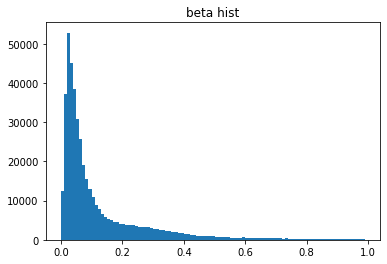

In [55]:
plt.hist(ECoC.beta, bins=np.arange(0, 1, 0.01))
plt.title("beta hist")
plt.savefig("../plot/beta hist.png")
plt.show()

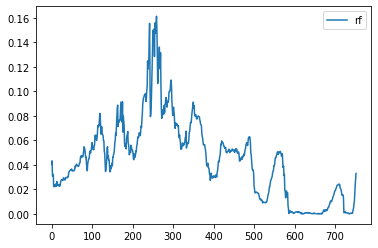

In [66]:
rf[["rf"]].plot()

In [48]:
grouped = ECoC.groupby("name")

ls = []
for group in grouped:
    name = group[0]
    group = group[1]
    if group.shape[0] > 120:
        group["10y_avg"] = group["coe"].rolling(120).mean()
        group["name"] = name
        ls.append(group.dropna())
ave_ecoc = pd.concat(ls)
ave_ecoc.to_excel("../clean_data/ave_ecoc_1110.xlsx")

In [51]:
ave_ecoc[["coe", "10y_avg"]].describe()

,coe,10y_avg
count,269807.000000,269807.000000
mean,0.024225,0.034062
std,0.023755,0.024965
min,-0.003407,0.001047
25%,0.003858,0.011972
50%,0.015510,0.027778
75%,0.047443,0.049705
max,0.241555,0.181526


## Use S&P 500 to cal beta

In [63]:
x = mkt1["mkt_excess"]
# test
# group = close_price[close_price["Ticker"] == "ACF"]
ECoC1 = pd.DataFrame()
ls = []
for group in cp_grouped:
    name = group[0]
    y = group[1].copy()
    y = y[["excess_ret"]]
    xy = y.merge(x, left_index=True, right_index=True, how="inner")
    if xy.shape[0] > 60:
        rols = RollingOLS(xy.iloc[:, 0], xy.iloc[:, 1], window=60).fit()
        params = rols.params
        params.columns = ["beta"]
        params["name"] = name
        ls.append(params)
ECoC1 = pd.concat(ls)
ECoC1

,beta,name
1979-01-31,NaN,A
1979-02-28,NaN,A
1979-03-30,NaN,A
1979-04-30,NaN,A
1979-05-31,NaN,A
...,...,...
2021-08-31,0.582004,ZTS
2021-09-30,0.588592,ZTS
2021-10-29,0.605288,ZTS
2021-11-30,0.590996,ZTS


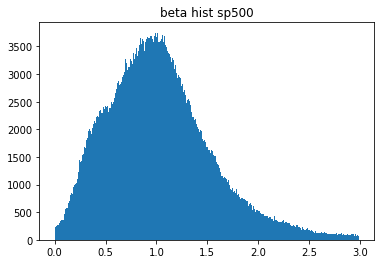

In [65]:
plt.hist(ECoC1.beta, bins=np.arange(0, 3, 0.01))
plt.title("beta hist sp500")
plt.savefig("../plot/beta hist sp500.png")
plt.show()

In [70]:
ECoC1 = ECoC1.merge(rf, left_index=True, right_on="MCALDT")
ECoC1["cost of equity"] = ECoC1["beta"] * 0.06 + ECoC1["rf"]
ECoC1[["beta", "cost of equity"]].describe()

,beta,cost of equity
count,442053.000000,442053.000000
mean,1.039568,0.092641
std,0.578564,0.041951
min,-2.438855,-0.128615
25%,0.655020,0.062556
50%,0.980632,0.089007
75%,1.326439,0.118886
max,6.192964,0.380288


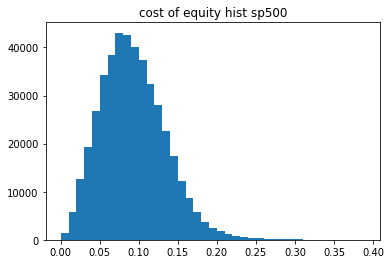

In [72]:
plt.hist(ECoC1["cost of equity"], bins=np.arange(0, 0.4, 0.01))
plt.title("cost of equity hist sp500")
plt.savefig("../plot/cost of equity hist sp500.png")
plt.show()

In [73]:
ECoC1.to_excel("../clean_data/ecoc1_1110.xlsx")

In [74]:
grouped = ECoC1.groupby("name")

ls = []
for group in grouped:
    name = group[0]
    group = group[1]
    if group.shape[0] > 120:
        group["10y_avg"] = group["coe"].rolling(120).mean()
        group["name"] = name
        ls.append(group.dropna())
ave_ecoc1 = pd.concat(ls)
ave_ecoc1.to_excel("../clean_data/ave_ecoc1_1110.xlsx")